In [ ]:
pip install -r requirements.txt

In [ ]:
import os
import pandas as pd

df_wvs = pd.read_csv('../master_thesis_R/wvs_ts_w1_w7.csv')
df_dsp = pd.read_csv('../master_thesis_R/dsp_cy_v6.csv')
df_fh = pd.read_xml('../master_thesis_R/fh_cy_v6.xml')


# Exploration WVS

In [46]:
df_wvs

,version,doi,S001,S002VS,S003,COUNTRY_ALPHA,COW_NUM,COW_ALPHA,S004,S006,...,Y023A,Y023B,Y023C,Y024A,Y024B,Y024C,survself,tradrat5,TradAgg,SurvSAgg
0,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,1,...,0.000000,0.444444,0.444444,0.33,0.0,0.165,-1.011276,0.160847,0.158964,-1.792410
1,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,2,...,0.111111,0.444444,0.444444,0.33,0.0,0.165,-0.688773,0.409283,0.558946,-1.208679
2,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,3,...,0.000000,0.444444,0.444444,0.33,0.5,0.415,NaN,NaN,NaN,NaN
3,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,4,...,0.000000,0.333333,0.333333,0.33,0.0,0.165,-1.319863,0.733956,1.081669,-2.350952
4,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,5,...,0.000000,0.333333,0.333333,0.00,0.5,0.250,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443483,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,7,716,ZWE,552,ZIM,-4,716071211,...,0.000000,0.000000,0.000000,0.66,0.5,0.580,-0.738923,-0.774148,-1.346378,-1.299450
443484,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,7,716,ZWE,552,ZIM,-4,716071212,...,0.000000,0.000000,0.777778,1.00,0.0,0.500,-0.445039,0.282275,0.354463,-0.767520
443485,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,7,716,ZWE,552,ZIM,-4,716071213,...,0.000000,0.000000,0.000000,0.33,0.0,0.165,-0.925464,-0.436454,-0.802691,-1.637090
443486,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,7,716,ZWE,552,ZIM,-4,716071214,...,0.000000,0.000000,0.000000,0.00,0.0,0.000,-2.398929,1.218936,1.862486,-4.304062


In [47]:
total_unique_countries = df_wvs["COUNTRY_ALPHA"].nunique()
print("Total unique countries:", total_unique_countries)

Total unique countries: 108


In [57]:
min_year = df_wvs["S020"].min()
max_year = df_wvs["S020"].max()

print("Min year:", min_year)
print("Max year:", max_year)

Min year: 1989
Max year: 2023


In [58]:
## Droping first wave (1981-1984)
df_wvs = df_wvs[df_wvs["S020"] > 1984]

## Exploring demographics

### Rural vs. Urban

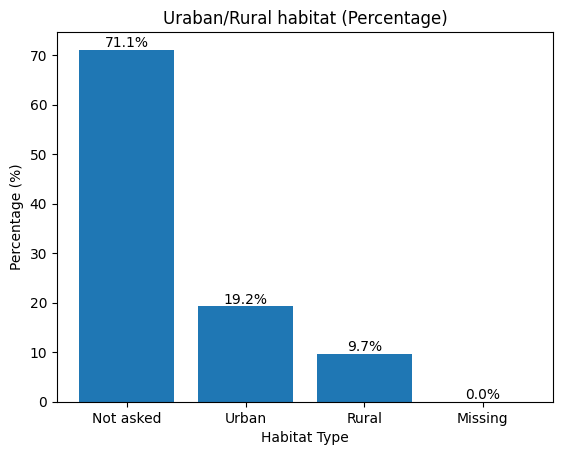

In [59]:
from matplotlib import pyplot as plt

# Define value mappings
value_labels = {
    1: "Urban",
    2: "Rural",
    -1: "Don't know",
    -2: "No answer",
    -4: "Not asked",
    -5: "Missing"
}

# Replace values only for plotting
counts = df_wvs["X050C"].replace(value_labels).value_counts(normalize=True) * 100

# Histogram (incl. percentages)
plt.bar(counts.index, counts.values)  
plt.title("Uraban/Rural habitat (Percentage)")
plt.xlabel("Habitat Type")
plt.ylabel("Percentage (%)")

# Show percentages on top of bars
for index, value in enumerate(counts.values):
    plt.text(counts.index[index], value, f'{value:.1f}%', ha='center', va='bottom')

plt.show()

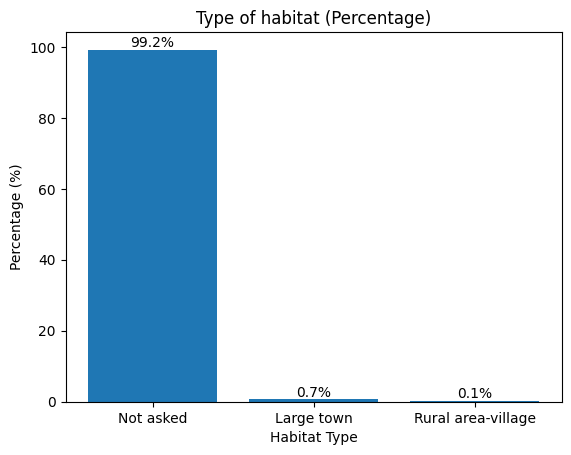

In [69]:
# Define value mappings
value_labels = {
    1: "Rural area-village",
    2: "Small-medium town",
    3: "Large town",
    -1: "Don't know",
    -2: "No answer",
    -4: "Not asked",
    -5: "Missing"
}

# Replace values only for plotting
counts = df_wvs["X050"].replace(value_labels).value_counts(normalize=True) * 100

# Histogram (incl. percentages)
plt.bar(counts.index, counts.values)  
plt.title("Type of habitat (Percentage)")
plt.xlabel("Habitat Type")
plt.ylabel("Percentage (%)")

# Show percentages on top of bars
for index, value in enumerate(counts.values):
    plt.text(counts.index[index], value, f'{value:.1f}%', ha='center', va='bottom')

plt.show()

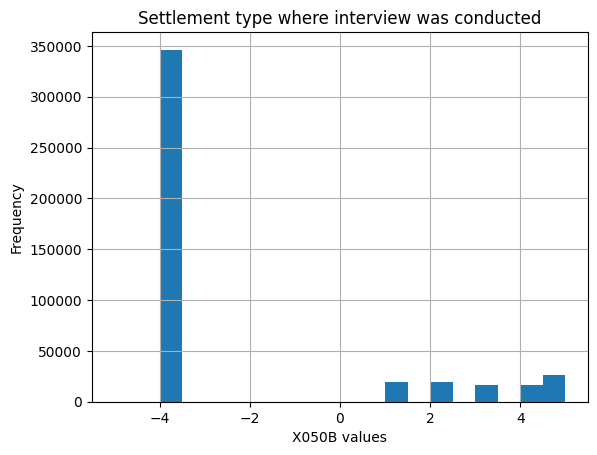

In [51]:
df_wvs["X050B"].hist(bins=20)
plt.title("Settlement type where interview was conducted")
plt.xlabel("X050B values")
plt.ylabel("Frequency")
plt.show()

## Welzel Skepticism Sub-Index - (Or skepticism of the justice system)
**Meaning:** 3-item index measuring a national culture’s distance to “sacred” sources of authority in the domain of order institutions (army, police, courts).  

- A lower score (closer to 0) means that people have a strong respect for and adherence to the authority of institutions like the army, police, and courts. In other words, the society is more traditional and respects these sources of authority.
- A higher score (closer to 1.0) indicates that people reject or question the authority of these institutions, showing a more secular or modern attitude towards them. This suggests that these institutions hold less influence or power over society. 

**Scaling:** Multi-point scale, ranging from a theoretical minimum of 0 when the least secular position is taken on all 3 items, to a maximum of 1.0 when the most secular position is taken on all 3 items. Intermediate positions are given in fractions of 1.0. Country scores are population averages (arithmetic mean) on the 0-1 index.

**Source:** Index invented and documented in Welzel, Freedom Rising (2013: 63-66), www.cambridge.org/welzel (Online Appendix, p. 12-19), based on data from the World Values Surveys, all countries and time points.  

In [61]:
yearly_stats = df_wvs.groupby("S020")["Y014"].describe()
print(yearly_stats)

        count      mean       std   min       25%       50%       75%    max
S020                                                                        
1989    905.0  0.513667  0.226933  0.00  0.330000  0.550000  0.663333  1.000
1990  18283.0  0.448611  0.243593  0.00  0.330000  0.440000  0.660000  1.000
1991   3706.0  0.562019  0.245874  0.00  0.440000  0.553333  0.773333  1.000
1995  14699.0  0.485928  0.227110  0.00  0.330000  0.440000  0.660000  1.000
1996  31680.0  0.478383  0.239795  0.00  0.330000  0.440000  0.660000  1.000
1997  13840.0  0.501956  0.223019  0.00  0.330000  0.550000  0.660000  1.000
1998  12043.0  0.464435  0.226597  0.00  0.330000  0.440000  0.660000  1.000
1999   4620.0  0.490906  0.249630  0.00  0.346440  0.476790  0.660000  1.000
2000  10072.0  0.485972  0.233129  0.06  0.346440  0.476790  0.632880  0.928
2001  29827.0  0.395014  0.227913  0.06  0.216090  0.346440  0.533000  0.928
2002   4483.0  0.441480  0.231109  0.06  0.346440  0.372180  0.632880  0.928

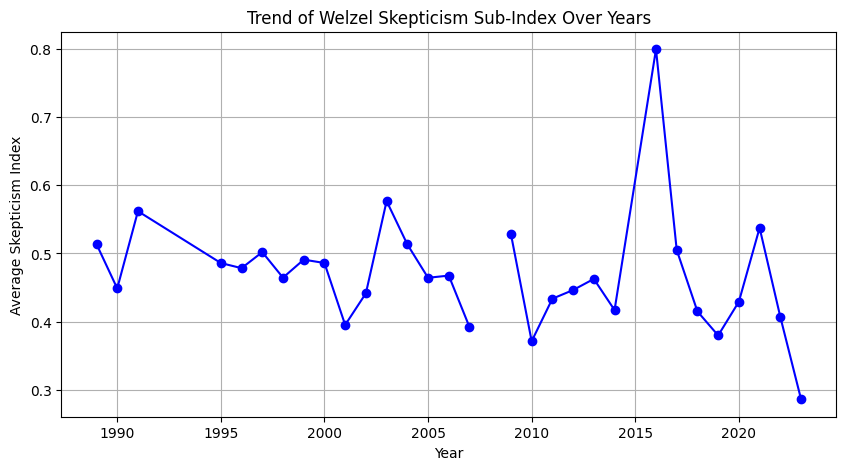

In [ ]:
# Mean Skepticism Index per year
yearly_avg = df_wvs.groupby("S020")["Y014"].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Average Skepticism Index")
plt.title("Trend of Welzel Skepticism Sub-Index Over Years")
plt.grid(True)

plt.show()

## Wezel Defiance Sub-Index
**Meaning:** 3-item index measuring a national culture’s distance to “sacred” sources of authority in the domain of patrimonial authority (the nation, the state, the parents).  

- A lower score (closer to 0) means people tend to strongly respect and follow these traditional authorities.
- A higher score (closer to 1.0) means people tend to question, challenge, or reject these authorities in favor of more secular or independent perspectives.

**Scaling:** Multi-point scale, ranging from a theoretical minimum of 0 when the least secular position is taken on all 3 items, to a maximum of 1.0 when the most secular position is taken on all 3 items. Intermediate positions are given in fractions of 1.0. Country scores are population averages (arithmetic mean) on the 0-1 index.

**Source:** Index invented and documented in Welzel, Freedom Rising (2013: 63-66), www.cambridge.org/welzel (Online Appendix, p. 12-19), based on data from the World Values Surveys, all countries and time points.  

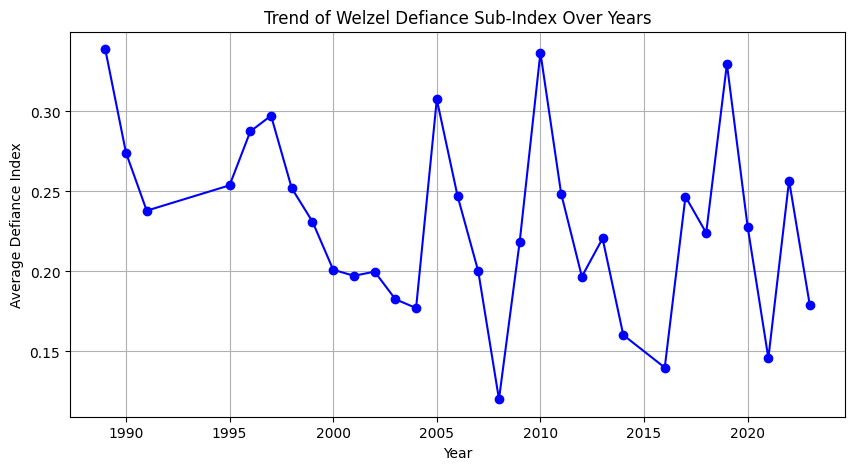

In [ ]:
# Mean of Defiance Index per year
yearly_avg = df_wvs.groupby("S020")["Y011"].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Average Defiance Index")
plt.title("Trend of Welzel Defiance Sub-Index Over Years")
plt.grid(True)

plt.show()

In [ ]:
# Group by year and calculate the average for each sub-index
avg_defiance_by_year = df_wvs.groupby("S020")["Y011"].mean()
avg_skepticism_by_year = df_wvs.groupby("S020")["Y014"].mean()

# Year with the highest and lowest average for Defiance (Y011)
max_defiance_year = avg_defiance_by_year.idxmax()
min_defiance_year = avg_defiance_by_year.idxmin()

# Year with the highest and lowest average for Skepticism (Y014)
max_skepticism_year = avg_skepticism_by_year.idxmax()
min_skepticism_year = avg_skepticism_by_year.idxmin()

# Output the results
print(f"Year with highest defiance (Y011): {max_defiance_year}")
print(f"Year with lowest defiance (Y011): {min_defiance_year}")
print(f"Year with highest skepticism (Y014): {max_skepticism_year}")
print(f"Year with lowest skepticism (Y014): {min_skepticism_year}")

Year with highest defiance (Y011): 1989
Year with lowest defiance (Y011): 2008
Year with highest skepticism (Y014): 2016
Year with lowest skepticism (Y014): 2023


In [ ]:
# Group by country and average for each sub-index
avg_defiance_by_country = df_wvs.groupby("COUNTRY_ALPHA")["Y011"].mean()
avg_skepticism_by_country = df_wvs.groupby("COUNTRY_ALPHA")["Y014"].mean()

# Top 10 countries with the highest and lowest average for Defiance (Y011)
top_10_defiance_high = avg_defiance_by_country.nlargest(10)
top_10_defiance_low = avg_defiance_by_country.nsmallest(10)

# Get the top 10 countries with the highest and lowest average for Skepticism (Y014)
top_10_skepticism_high = avg_skepticism_by_country.nlargest(10)
top_10_skepticism_low = avg_skepticism_by_country.nsmallest(10)

# Output the results
print("Top 10 countries with the highest defiance (Y011):")
print(top_10_defiance_high)

print("\nTop 10 countries with the lowest defiance (Y011):")
print(top_10_defiance_low)

print("\nTop 10 countries with the highest skepticism (Y014):")
print(top_10_skepticism_high)

print("\nTop 10 countries with the lowest skepticism (Y014):")
print(top_10_skepticism_low)

Top 10 countries with the highest defiance (Y011):
COUNTRY_ALPHA
JPN    0.549672
LVA    0.477452
SWE    0.466760
HKG    0.437364
KOR    0.437043
TWN    0.435271
FIN    0.434861
MAC    0.427560
NOR    0.427429
LTU    0.408053
Name: Y011, dtype: float64

Top 10 countries with the lowest defiance (Y011):
COUNTRY_ALPHA
QAT    0.013440
GHA    0.054183
UZB    0.073355
ECU    0.076818
LBY    0.077880
JOR    0.079227
PRI    0.080409
YEM    0.090099
VEN    0.094117
TTO    0.094672
Name: Y011, dtype: float64

Top 10 countries with the highest skepticism (Y014):
COUNTRY_ALPHA
HTI    0.799867
BOL    0.684665
NIC    0.668142
DOM    0.664996
PER    0.664341
ARG    0.660247
GTM    0.649895
LVA    0.615695
YEM    0.613404
LTU    0.609433
Name: Y014, dtype: float64

Top 10 countries with the lowest skepticism (Y014):
COUNTRY_ALPHA
QAT    0.111048
JOR    0.181463
VNM    0.190658
UZB    0.191661
TJK    0.255875
TZA    0.287780
CHN    0.289902
TUR    0.305236
KWT    0.305726
FIN    0.313973
Name: Y014, dt

## Variables of interest

In [76]:
import pandas as pd
import numpy as np

# Function to normalize (multi-point scale 0 to 1)
def multi_scale(value):
    if value == 1:
        return 1.0  # Very important
    elif value == 2:
        return 0.67  # Rather important
    elif value == 3:
        return 0.33  # Not very important
    elif value == 4:
        return 0.0  # Not at all important
    else:
        return np.nan  # Invalid or missing values

# Apply the normalization to both A001 and A002
df_wvs['norm_A001'] = df_wvs['A001'].apply(multi_scale)
df_wvs['norm_A002'] = df_wvs['A002'].apply(multi_scale)

# Create the "importance_close_circle" by averaging the normalized values of A001 and A002
df_wvs['importance_close_circle'] = df_wvs[['norm_A001', 'norm_A002']].mean(axis=1)

# Inspect the first few rows of the new indicator
print(df_wvs[['A001', 'A002', 'importance_close_circle']].head(100))

    A001  A002  importance_close_circle
0      1     2                    0.835
1      1     2                    0.835
2      1     2                    0.835
3      1     2                    0.835
4      1     2                    0.835
..   ...   ...                      ...
95     1     2                    0.835
96     1     2                    0.835
97     1     2                    0.835
98     1     3                    0.665
99     1     3                    0.665

[100 rows x 3 columns]


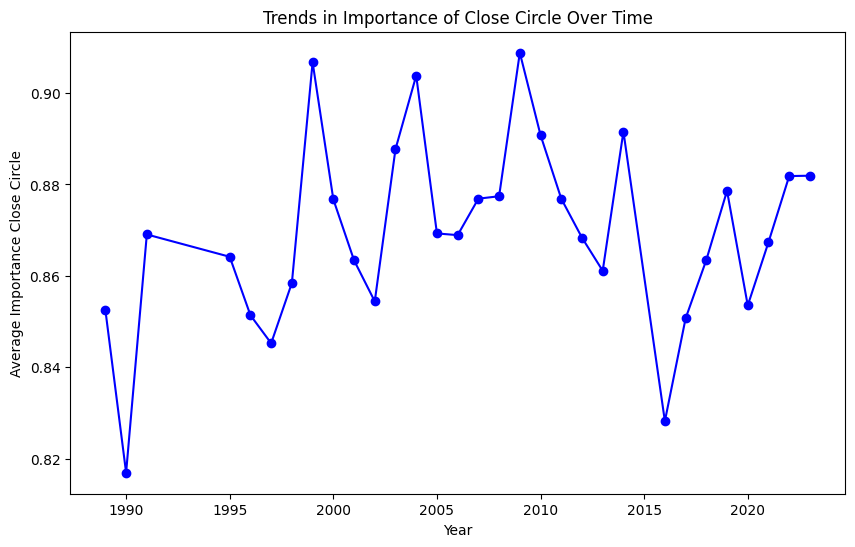

In [80]:
# Group by year and calculate the mean of importance_close_circle'
yearly_trends = df_wvs.groupby('S020')['importance_close_circle'].mean()

# Plot the trends over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_trends.index, yearly_trends.values, marker='o', linestyle='-', color='b')
plt.title("Trends in Importance of Close Circle Over Time")
plt.xlabel("Year")
plt.ylabel("Average Importance Close Circle")
plt.show()

# Exploration Digital Society Project

In [9]:
total_unique_countries = df_dsp["country_name"].nunique()
print("Total unique countries:", total_unique_countries)

Total unique countries: 179


In [5]:
df_dsp

,country_name,country_text_id,country_id,year,historical_date,codingstart,codingend,gapstart1,gapstart2,gapstart3,...,v2smorgtypes_1,v2smorgtypes_2,v2smorgtypes_3,v2smorgtypes_4,v2smorgtypes_5,v2smorgtypes_6,v2smorgtypes_7,v2smorgtypes_8,v2smorgtypes_9,v2smorgtypes_nr
0,Mexico,MEX,3,2000,2000-12-31,2000,2023,NaN,NaN,NaN,...,0.333,0.667,0.0,0.167,0.0,0.0,0.0,0.0,0.167,6
1,Mexico,MEX,3,2001,2001-12-31,2000,2023,NaN,NaN,NaN,...,0.333,0.667,0.0,0.167,0.0,0.0,0.0,0.0,0.167,6
2,Mexico,MEX,3,2002,2002-12-31,2000,2023,NaN,NaN,NaN,...,0.333,0.667,0.0,0.167,0.0,0.0,0.0,0.0,0.167,6
3,Mexico,MEX,3,2003,2003-12-31,2000,2023,NaN,NaN,NaN,...,0.333,0.667,0.0,0.167,0.0,0.0,0.0,0.0,0.167,6
4,Mexico,MEX,3,2004,2004-12-31,2000,2023,NaN,NaN,NaN,...,0.333,0.667,0.0,0.167,0.0,0.0,0.0,0.0,0.167,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4273,Zanzibar,ZZB,236,2019,2019-12-31,2000,2023,NaN,NaN,NaN,...,1.000,0.333,0.0,0.000,0.0,0.0,0.0,0.0,0.333,6
4274,Zanzibar,ZZB,236,2020,2020-12-31,2000,2023,NaN,NaN,NaN,...,1.000,0.400,0.0,0.200,0.0,0.0,0.0,0.0,0.400,5
4275,Zanzibar,ZZB,236,2021,2021-12-31,2000,2023,NaN,NaN,NaN,...,0.500,0.500,0.5,0.000,0.0,0.0,0.0,0.0,0.250,4
4276,Zanzibar,ZZB,236,2022,2022-12-31,2000,2023,NaN,NaN,NaN,...,1.000,0.333,0.0,0.000,0.0,0.0,0.0,0.0,0.333,3


In [16]:
min_year = df_dsp["year"].min()
max_year = df_dsp["year"].max()

print("Earliest year:", min_year)
print("Latest year:", max_year)


Earliest year: 2000
Latest year: 2023
